In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Assignment 5 Key

# Q2

Consider a *hydrostatic* wave being forced at the mouth of a rectangular fjord of depth $H$ and length $L$. The sea-surface height at the mouth of the fjord is prescribed by the sea-surface height in the ocean $\eta(0,t) = \eta_O \cos (\omega t)$, where $\omega$ is the tidal frequency.

## Q2.1

Derive an expression for the  the sea-surface height $\eta$ as a function of $x$ in the fjord assuming that there is no energy dissipation in the fjord.  Describe the response of sea-surface height at the head of the fjord as a function of the length of the fjord, $L$.  Also note that there are sometimes nulls in the response in the fjord.  Where are they?

## A2.1

The wave has a general solution:

$$ \eta(x, t) = \mathbb{R}[A e^{i(kx - \omega t)} + B e^{i(-kx - \omega t)}]$$

We need two boundary conditions, one at the head of the fjord, and one at the mouth.  If we call the mouth $x=L$ then 

$$ \eta_0 = \mathbb{R}[A e^{i kL} + B e^{-ikL}]$$

At $x=0$, we must have $u=0$.  Recall that for hydrostatic waves

$$\partial u/\partial t = -g \partial \eta / \partial x$$

So at $x=0$, we have $\partial \eta / \partial x = 0$, or $kA + kB = 0$, or $A = -B$.  Back into the expresion above, and we have that 

$$ A = \frac{\eta_0}{2\cos{kL}}$$

and we have a full expression:

$$ \eta(x, t) = \eta_0 \frac{\cos{kx}}{\cos{kL}} \cos{\omega t}$$

This is a standing wave, and the whole fjord rises or falls in phase (or 180 degress out of phase)

### Alternate:

If you called the mouth $x=0$ and the head $x=L$ then we have at the head:

$$ ik\left[Ae^{ikL}  + B e^{-ikL}\right] = 0$$

and 

$$B = A e^{2ikL}$$

At the mouth, we have 

$$ \mathbb{R} \left[ A e^{-i\omega t } (1 + e^{2ikL})\right] = \eta_0 \cos{\omega t} $$

or 

$$ A = \frac{\eta_0 e^{-ikL}}{e^{-ikL} + e^{+ikL}} = \frac{\eta_0 e^{-ikL}}{2\cos{kL}}$$ 

so we have the expression:

$$ \eta(x, t) = \eta_0 \frac{\cos{k(x-L)}}{\cos{kL}} \cos{\omega t}$$

which is exactly the same as above, except $x$ is displaced by $L$.

## But I really hate complex numbers....

Let just do $x=0$ is the head of the fjord and let 

$$ \eta =  a\cos(kx - \omega t) + b\sin(kx - \omega t) + c\cos(kx + \omega t) + d\sin(kx + \omega t) $$

Note that you have four unknowns and this gets you any combination of wave phases you want.  If we note that $\partial \eta / \partial x = 0$ at $x=0$, then:

$$ 0 = -ka \sin\left(\omega t\right) - bk \cos(\omega t) + c \sin{\omega t} - d \cos{\omega t}$$

In order for that to be true for all values of t, we *must* have:  $a=c$ and $b=-d$, and now 

$$\eta = b \left(\cos(kx-\omega t) + \cos(kx + \omega t)  \right)$$

Now use the other BC at $x=L$:

$$\eta(x=kL) = \eta_0 \cos(\omega t) = b \left(\cos(kL-\omega t) + \cos(kL + \omega t)  \right)$$

$$\eta_0 \cos(\omega t) = b \left(\cos(kL)\cos(\omega t) + \sin(kL)\sin(\omega t) + \cos(kL)\cos(\omega t) - \sin(kL)\sin(\omega t) \right)$$  

and we get the same result as before:

$$ \eta(x, t) = \eta_0 \frac{\cos{kx}}{\cos{kL}} \cos{\omega t}$$




<IPython.core.display.Javascript object>


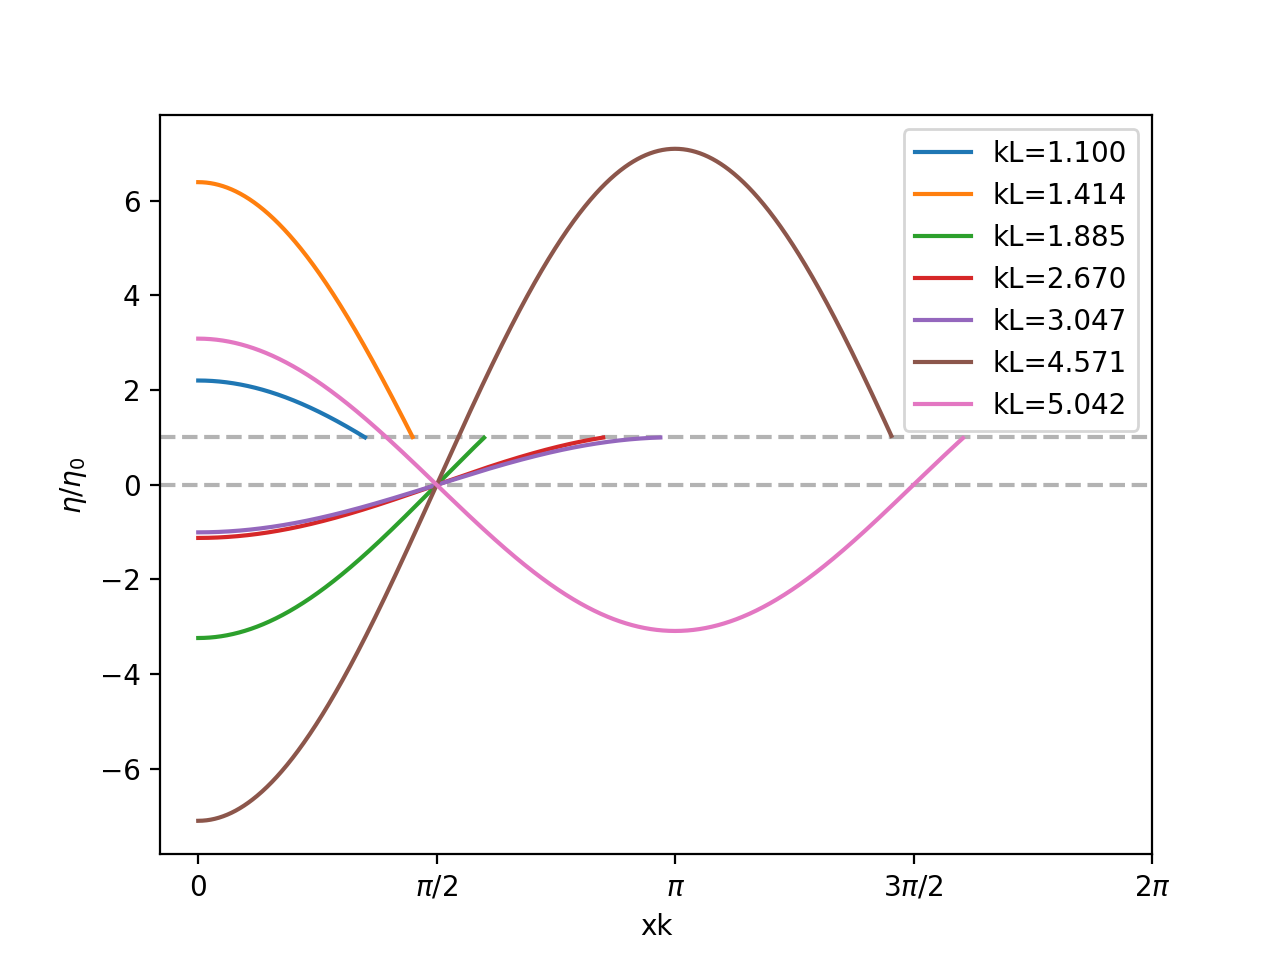

[Text(0,0,'0'),
 Text(0,0,'$\\pi/2$'),
 Text(0,0,'$\\pi$'),
 Text(0,0,'$3\\pi/2$'),
 Text(0,0,'$2\\pi$')]

In [71]:
fig, ax = plt.subplots()
x = np.arange(0., 1., 0.001)
ax.axhline(0., linestyle='--', color='0.7')
ax.axhline(1., linestyle='--', color='0.7')
for kL in [np.pi/2*0.7, np.pi/2*0.9, np.pi/2 * 1.2, np.pi/2 * 1.7, np.pi*0.97, 3*np.pi/2*0.97, 3*np.pi/2*1.07   ]:
    omt=0.
    ax.plot(x*kL, np.cos(x*kL)/np.cos(kL)*np.cos(omt), label='kL=%1.3f'%kL)
ax.legend()
ax.set_xlabel('xk')
ax.set_ylabel('$\eta / \eta_0$')
ax.set_xticks(np.arange(0, 2*np.pi+0.1, np.pi/2))
ax.set_xticklabels(['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$' ])


At the head of the fjord, 

$$\eta(x, 0) = \eta_0 \frac{\cos{\omega t}}{\cos{kL}}$$

Note that as $kL =  n\pi/2$ the denominator goes to zero and we have a reonant response.  Also note that the sign of the response at the head switches to being in phase or 180 degrees out of phase with the mouth: 

<IPython.core.display.Javascript object>


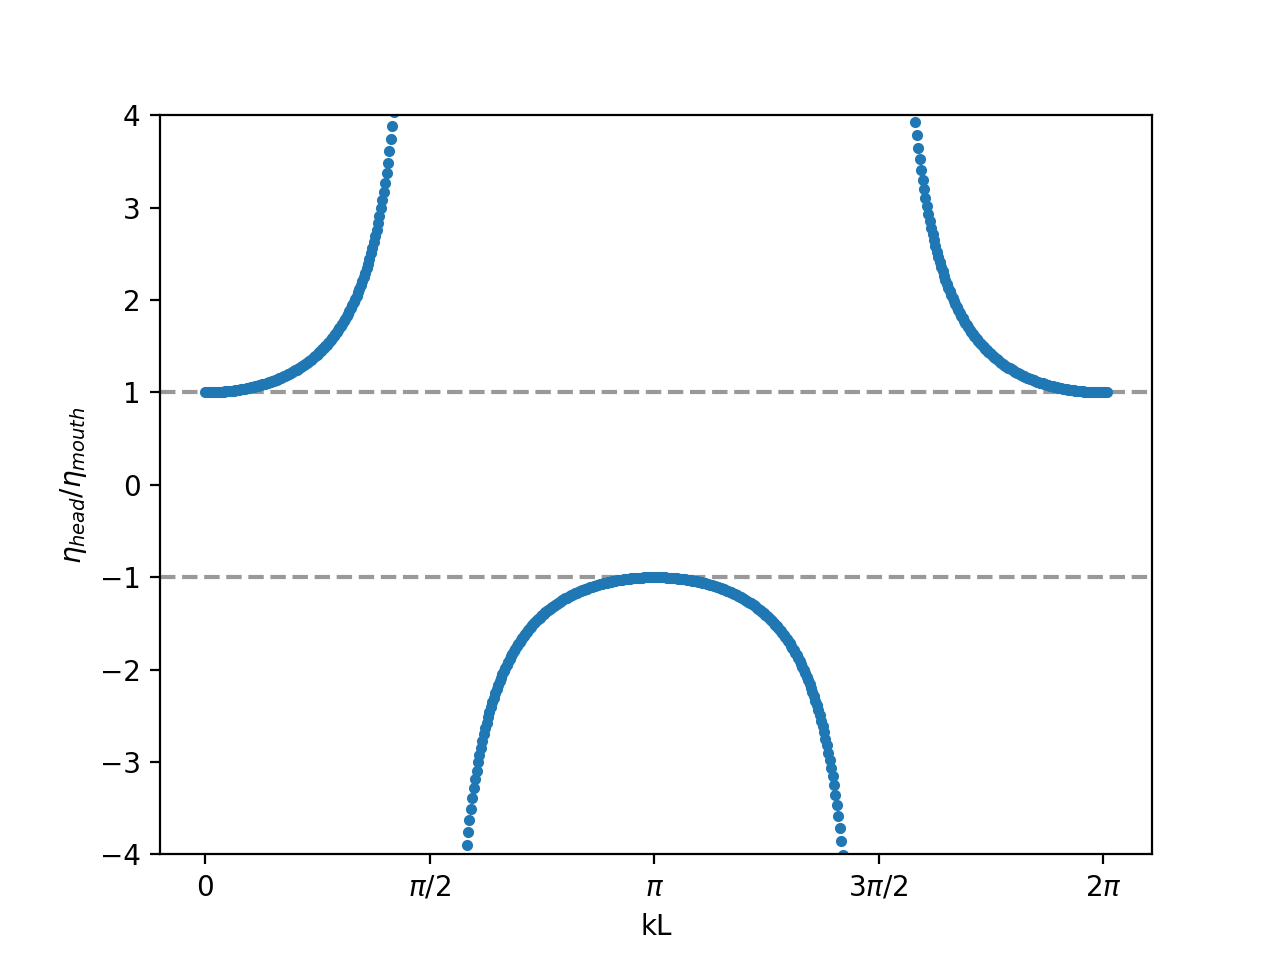

[Text(0,0,'0'),
 Text(0,0,'$\\pi/2$'),
 Text(0,0,'$\\pi$'),
 Text(0,0,'$3\\pi/2$'),
 Text(0,0,'$2\\pi$')]

In [72]:
kL = np.arange(0, np.pi*2+0.03, 0.01)
fig,ax = plt.subplots()
ax.plot(kL, 1./np.cos(kL),'.')
ax.set_ylim([-4, 4])
ax.set_xlabel('kL')
ax.set_ylabel('$\eta_{head}/\eta_{mouth}$')
ax.axhline(1., linestyle='--', color='0.6', zorder=-2)
ax.axhline(-1., linestyle='--', color='0.6', zorder=-2)
ax.set_xticks(np.arange(0, 2*np.pi+0.1, np.pi/2))
ax.set_xticklabels(['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$' ])

If $kL>\pi/2$ then there are nulls at $kx=n\pi/2$


## Q2.2
What is the relationship between $u(x,t)$ and $\eta(x,t)$ in the fjord?  What happens to the velocity at the mouth as the fjord length approaches the resonant length?

## A2.2

$$ \frac{\partial u}{\partial t} = -g \frac{\partial \eta}{\partial x} $$

or


$$ u(x, t) = -\eta_0 \frac{gk}{\omega}\frac{\sin{kx}}{\cos{kL}} \sin{\omega t}$$

So u and eta are in phase.  

$$ u(L, t) = -\eta_0\frac{gk}{\omega}  \frac{\sin{kL}}{\cos{kL}} \sin{\omega t}$$




<IPython.core.display.Javascript object>


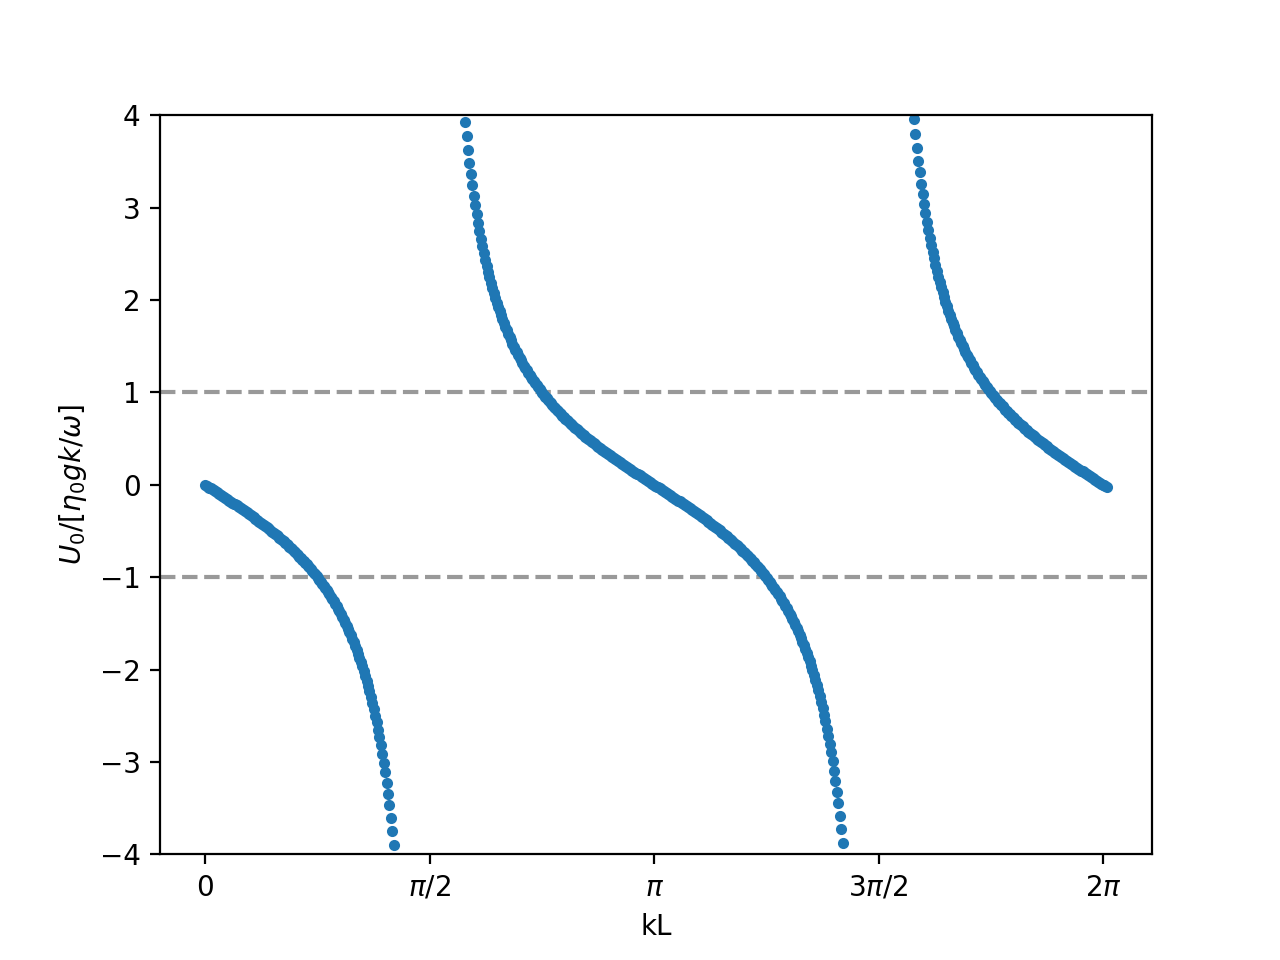

[Text(0,0,'0'),
 Text(0,0,'$\\pi/2$'),
 Text(0,0,'$\\pi$'),
 Text(0,0,'$3\\pi/2$'),
 Text(0,0,'$2\\pi$')]

In [73]:
kL = np.arange(0, np.pi*2+0.03, 0.01)
fig,ax = plt.subplots()
ax.plot(kL, -np.tan(kL),'.')
ax.set_ylim([-4, 4])
ax.set_xlabel('kL')
ax.set_ylabel('$U_{0}/ [\eta_{0}gk/\omega]$')
ax.axhline(1., linestyle='--', color='0.6', zorder=-2)
ax.axhline(-1., linestyle='--', color='0.6', zorder=-2)
ax.set_xticks(np.arange(0, 2*np.pi+0.1, np.pi/2))
ax.set_xticklabels(['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$' ])

So, again we see that we need infinite velocity at the mouth to achieve the resonance, and that the mouth can be 180 degrees out of phase with the head.